<a href="https://colab.research.google.com/github/bakarin/DogBreed-Image-Classifier/blob/master/DogBreed_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification with a Convolutional Neural Network in TensorFlow
We are building a CNN with 6 convolutional layers.


## Imports

In [0]:
%tensorflow_version 2.x # Befehl für Google Colab für Tensorflow 2
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Befehl für Google Colab für Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

## Helpers

Load the following helper functions via the  `deeplearning2020` python package:

- def plot_learning_curve(title, x, y, y_test, ylim=0.6)
- def plot_history(title, history, ylim=0.6)
- def plot_images(images, labels)

helper functions [source](https://github.com/into-ai/deeplearning2020/blob/master/deeplearning2020/helpers.py)

In [0]:
!pip install --upgrade deeplearning2020
from deeplearning2020 import helpers

Requirement already up-to-date: deeplearning2020 in /usr/local/lib/python3.6/dist-packages (0.4.21)


## Load Dataset

Imagewoof is a subset of 10 classes from Imagenet that are all dog breeds. The breeds are: Australian terrier, Border terrier, Samoyed, Beagle, Shih-Tzu, English foxhound, Rhodesian ridgeback, Dingo, Golden retriever, Old English sheepdog.

In [0]:
from deeplearning2020.datasets import ImageWoof
train_data, test_data, classes = ImageWoof.load_data()

328294400/328288506 [==============================] - 7s 0us/step
/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images


In [0]:
# number of classes
classes.shape

(10,)

In [0]:
# classes
n_classes = classes.shape[0]
print(classes)

['Shih-Tzu' 'Rhodesian ridgeback' 'Beagle' 'English foxhound'
 'Border terrier' 'Australian terrier' 'Golden retriever'
 'Old English sheepdog' 'Samoyed' 'Dingo']


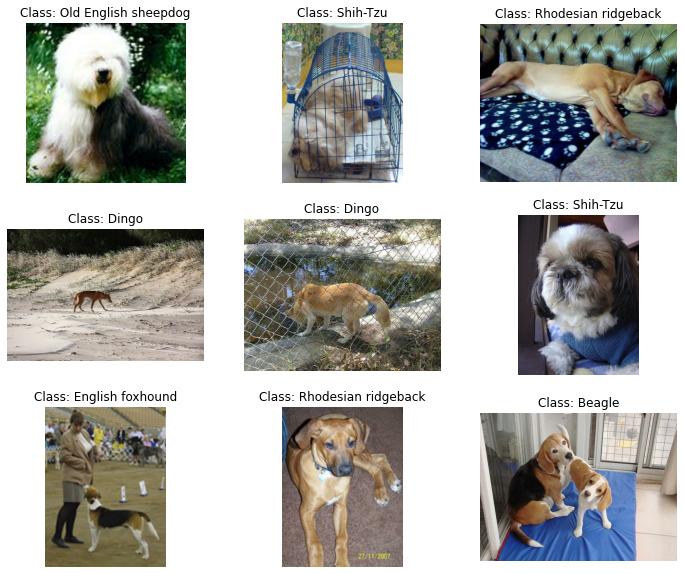

In [0]:
# display 9 images from the train set
helpers.plot_images(train_data.take(9), classes)

## Preprocessing
 Resize all images to 300 x 300 pixels


In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label

Apply `preprocess` function to all data

`.batch` prepares the next batch of the specified batch_size

`.prefetch` loads the next batch into memory


In [0]:
batch_size = 32 
train_data = train_data.shuffle(1000) 

print('train_data shape before preprocessing: ', train_data)
train_data = train_data.map(preprocess).batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess).batch(batch_size).prefetch(1)
print('train_data shape after preprocessing: ', train_data)

train_data shape before preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
train_data shape after preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


## Model Definition

- Input Layer with 6 Convolutional Layers with ReLu Activation function and with a Max-Pooling Layer each
- 1 Flatten Layer followed by 2 Dense Layers of 1000 and 500 neurons 
- Output Function with `softmax` activation



In [0]:
# model
learning_rate=0.001
momentum=0.9
dense_neurons=1000
n_filters=512

activation='relu'

# 300x300 pixel with 3 RGB colors
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers with 1 Max Pooling Layer each
model = Conv2D(
    filters=256,
    kernel_size=(3,3),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 256, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = n_filters, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)

# Output Layer
output = Dense(n_classes, activation="softmax")(model)

CNN_model = Model(input_layer, output)

# Kompilieren des Modells
optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=momentum)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
CNN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 512)       0     

## Model Training

In [0]:
# model training for 12 epochs
history = CNN_model.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)

Epoch 1/12
283/283 [==============================] - 111s 393ms/step - loss: 2.2919 - accuracy: 0.1230 - val_loss: 2.2770 - val_accuracy: 0.1171
Epoch 2/12
283/283 [==============================] - 110s 388ms/step - loss: 2.2130 - accuracy: 0.1813 - val_loss: 2.0821 - val_accuracy: 0.2077
Epoch 3/12
283/283 [==============================] - 110s 389ms/step - loss: 2.0582 - accuracy: 0.2254 - val_loss: 2.1157 - val_accuracy: 0.2288
Epoch 4/12
283/283 [==============================] - 110s 389ms/step - loss: 2.0083 - accuracy: 0.2570 - val_loss: 2.0837 - val_accuracy: 0.2222
Epoch 5/12
283/283 [==============================] - 110s 388ms/step - loss: 1.9656 - accuracy: 0.2821 - val_loss: 1.9707 - val_accuracy: 0.2889
Epoch 6/12
283/283 [==============================] - 110s 388ms/step - loss: 1.9149 - accuracy: 0.3009 - val_loss: 1.9087 - val_accuracy: 0.3143
Epoch 7/12
283/283 [==============================] - 110s 388ms/step - loss: 1.8801 - accuracy: 0.3084 - val_loss: 1.8894 -

## Model Performance Evaluation

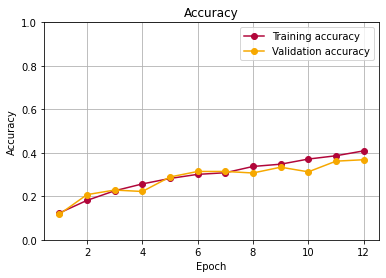

In [0]:
helpers.plot_history('Accuracy', history, 0)

The results are not the greatest. A lot of modifications would be necessary to get to a decent accuracy. Transfer Learning should be a much quicker solution.